# NLTK: text analysis

In [1]:
# On Jupyter - run this cell
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from urllib.request import urlopen 

In [2]:
# on Colab -- run this cell
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
from urllib.request import urlopen 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/filipacalado/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/filipacalado/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/filipacalado/nltk_data...


[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/filipacalado/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## selecting and cleaning our text

In [3]:
def clean(url):
    # loads and tokenizes the text
    open_url = urlopen(url)
    read_text = open_url.read()
    decoded_text = read_text.decode()
    tokens = nltk.word_tokenize(decoded_text)
    
    # cleans the text
    stops = stopwords.words('english')
    text = [] 
    for word in tokens:
        if word.isalpha(): 
            if word not in stops:
                lemmatizer = WordNetLemmatizer()
                # lemmatizer = nltk.stem.WordNetLemmatizer()
                root = lemmatizer.lemmatize(word)
                text.append(root.lower())     
    
    return text

In [4]:
# books by women
frankenstein = 'https://www.gutenberg.org/cache/epub/84/pg84.txt'
little_women = 'https://www.gutenberg.org/cache/epub/37106/pg37106.txt'
pride_prejudice = 'https://www.gutenberg.org/cache/epub/1342/pg1342.txt'
orlando = 'http://gutenberg.net.au/ebooks02/0200331.txt'

# books by men
dracula = 'https://www.gutenberg.org/cache/epub/345/pg345.txt'
dorian_gray = 'https://www.gutenberg.org/cache/epub/174/pg174.txt'
crime_punishment = 'https://www.gutenberg.org/files/2554/2554-0.txt'
heart_darkness = 'https://www.gutenberg.org/files/219/219-0.txt'

In [5]:
# running the "clean" function on the text "orlando"

orl = clean(orlando)

In [6]:
dor = clean(dorian_gray)

## NLTK methods for text analysis

In [7]:
orl[:20]

['project',
 'gutenberg',
 'australia',
 'title',
 'orlando',
 'author',
 'virginia',
 'woolf',
 'a',
 'project',
 'gutenberg',
 'australia',
 'ebook',
 'ebook',
 'no',
 'language',
 'english',
 'date',
 'first',
 'posted']

In [8]:
type(orl)

list

In [9]:
# turn our saved text (list of strings) to an NLTK object for 
# text analysis

orlando = nltk.Text(orl)

In [10]:
type(orlando)

nltk.text.Text

In [11]:
# checks the most common words

orlando.vocab().most_common(20)

[('orlando', 436),
 ('one', 371),
 ('the', 309),
 ('would', 292),
 ('could', 234),
 ('she', 218),
 ('i', 197),
 ('woman', 181),
 ('said', 172),
 ('but', 158),
 ('like', 157),
 ('thought', 155),
 ('time', 154),
 ('upon', 153),
 ('great', 143),
 ('he', 140),
 ('it', 135),
 ('man', 130),
 ('hand', 124),
 ('life', 124)]

In [12]:
dorian = nltk.Text(dor)

dorian.vocab().most_common(20)

[('i', 1684),
 ('he', 499),
 ('the', 434),
 ('one', 432),
 ('dorian', 410),
 ('it', 384),
 ('you', 376),
 ('would', 305),
 ('said', 261),
 ('lord', 248),
 ('life', 245),
 ('thing', 241),
 ('henry', 234),
 ('like', 215),
 ('gray', 195),
 ('know', 183),
 ('but', 182),
 ('man', 178),
 ('never', 173),
 ('harry', 166)]

In [13]:
# my goal is to compare the genders in the text

orlando.similar('woman')

no friend could till word growing saw moment servant reached always
wit sailor live wretch cried led resembled serpentine


In [14]:
# I want to explore the word "servant"

orlando.similar('servant')

year ready woman poor


In [15]:
orlando.similar('serpentine')

growing woman wrong


In [16]:
orlando.similar('friend')

word woman


In [17]:
orlando.similar('word')

friend case time dog fact woman armchair


In [18]:
orlando.concordance('serpentine')

Displaying 9 of 9 matches:
e but pitched without knowing far serpentine the barking thousand dog sounded 
er say one thought she stood bank serpentine it bronze colour boat skimming si
ant yet remains thing if one look serpentine state mind wave soon become big w
hel tell and repeating a toy boat serpentine alternately thought interchangeab
 husband i mean bonthrop toy boat serpentine ecstasy ecstasy matter thus spoke
epeating ecstasy ecstasy toy boat serpentine wealth power england sat sculptur
er shop climb hill i begin live i serpentine thought little boat climbing whit
lking became entirely path partly serpentine hawthorn bush partly lady gentlem
are girl russian trouser toy boat serpentine atlantic storm great wave past ca


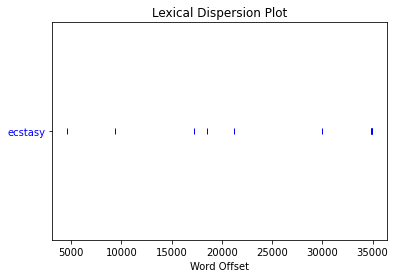

In [19]:
orlando.dispersion_plot(['ecstasy'])

In [20]:
# I want to dig deeper into this word 'ecstasy'

orlando.concordance('ecstasy')

Displaying 11 of 11 matches:
rst time murmured delight love then ecstasy lay lulled swoon ice would tell lov
 seemed vile corrected tore cut put ecstasy despair good night bad morning snat
ed hyacinth purple iris wrought cry ecstasy goodness beauty nature raising eye 
ago then pursued fled which greater ecstasy the man woman and perhaps no though
triking phrase depth despair height ecstasy writing one shadow darkened page sh
ivered air fell middle then strange ecstasy came some wild notion following bir
i mean bonthrop toy boat serpentine ecstasy ecstasy matter thus spoke aloud wai
onthrop toy boat serpentine ecstasy ecstasy matter thus spoke aloud waiting car
 boat raised height joy so repeated ecstasy stood waiting cross but traffic hea
g afternoon kept standing repeating ecstasy ecstasy toy boat serpentine wealth 
oon kept standing repeating ecstasy ecstasy toy boat serpentine wealth power en


In [21]:
dorian.similar('woman')

i life basil thing man round young would saying age say rank u looking
till spoke else argue favourite victim


In [22]:
dorian.concordance('ecstasy')

Displaying 3 of 3 matches:
 flute distant hautboy in tremulous ecstasy one hears dawn nightingale singing 
emed listen she transfigured joy an ecstasy happiness dominated dorian dorian c
 time whether one reading spiritual ecstasy mediæval saint morbid confession mo


In [23]:
dorian.common_contexts(['ecstasy'])

tremulous_one an_happiness spiritual_mediæval


In [24]:
orlando.common_contexts(['ecstasy'])

then_lay put_despair cry_goodness greater_the height_writing
strange_came serpentine_ecstasy ecstasy_matter repeated_stood
repeating_ecstasy ecstasy_toy


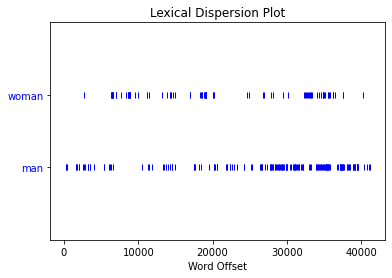

In [25]:
dorian.dispersion_plot(['woman', 'man'])

In [26]:
dorian.collocations()

lord henry; dorian gray; sibyl vane; project gutenberg; electronic
work; basil hallward; united states; said lord; lady narborough; shook
head; literary archive; archive foundation; project electronic;
gutenberg literary; dear fellow; adrian singleton; shrugged shoulder;
prince charming; young man; lady agatha


## group challenge

Compare and contrast one text by a woman and one text by a man. One possibility is to compare the main characters from each text. Another possibility is to compare the genders of the main characters. Or you can explore themes, or settings from the text.

After cleaning your text, use NLTK methods like: 
- `concordance()`
- `dispersion_plot([])`
- `collocations()`
- `common_contexts([])`
- most common words: `text.vocab().most_common(20)`

Try to answer the following questions:
- What words are associated with "man" and "woman" from each text?
- What are the differences between the genders?
- What are the differences in gender portrayal between the male and female authors?

Frankenstein: "man" vs "woman" 
- with `similar()`, "man" has 14 words, and "woman" has 1. 
- Means that men has more references than women text. Makes sense because it's about a male scientist creating a man. 

In [27]:
orlando.count("woman")

181

In [28]:
orlando.count("man")

130

## group challenge: monsters

Compare and contrast the monsters from Frankenstein and Dracula. One possibility is to compare the main characters from each text.

After cleaning your text, use NLTK methods like: 
- `concordance()`
- `dispersion_plot([])`
- `collocations()`
- `common_contexts([])`
- most common words: `text.vocab().most_common(20)`

Explore the different ways that monster is being portrayed across Dracula and Frankenstein. What words are associated with each one? Try using words like “Dracula” “Vampire” and “Murderer”, or other words that seem appropriate to your analysis

In [29]:
drac.concordance("monster")

NameError: name 'drac' is not defined

In [17]:
frank.concordance("monster")

Displaying 25 of 30 matches:
 window shutters i beheld miserable monster i created he held curtain bed eyes 
till alive walking i dreaded behold monster i feared still henry see entreating
e room tell oh save save i imagined monster seized i struggled furiously fell f
friend could restored life the form monster i bestowed existence ever eyes i ra
ened menaced i almost began think i monster said i he threatened excommunicatio
rable evils i lived daily fear lest monster i created perpetrate new wickedness
h satiated blood remaining abhorred monster fiend thou art the tortures hell mi
 i became fully convinced i reality monster i i filled bitterest sensations des
 around i saw heard none like was i monster blot upon earth men fled men disown
med agony accursed creator why form monster hideous even turned disgust god pit
he struggled violently let go cried monster ugly wretch you wish eat tear piece
 never see father must come hideous monster let go my papa punish you dare keep
round i mus

In [ ]:
# for frankenstein, words like "miserable", "fear", "solitude" appear in context with "monster"
# for dracula, words like "destroy", "terrible", "threw", "shouted" appear in context with "monster"

# these resulst suggest that Dracula was much less sympathetic than Frankenstein. 
# we sort of pity Frankenstein, while we fear Dracula. 

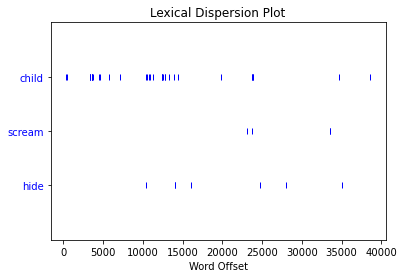

In [20]:
# dispersion plot of the words "child", "scream", and "hide"

frank.dispersion_plot(["child", "scream", "hide"])

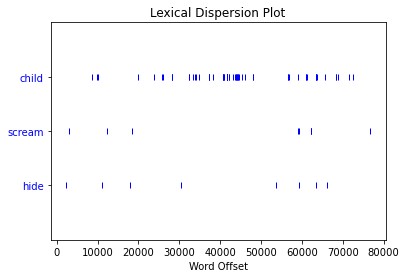

In [ ]:
# compared to frankenstein, dracula has more instances of "scream" and "hide". This suggests
# that the monster in dracula is more terrifying than the monster in frankenstein.

# the graph also shows more instances of "child" in the middle and end of the novel. Maybe there's 
# a loss of innocence "child" in frankenstein, but not in dracula. To find out, we would look at 
# the context of the word "child" across the novels.
 
drac.dispersion_plot(["child", "scream", "hide"])

In [22]:
# checking words similar to "child" in frankenstein and dracula

frank.similar('child')

shall but yet soon humanity closed sledge went replied friends
ineffectual monster virtue instructed fellowship


In [23]:
drac.similar('child')

i life dear night said it yes she duty whilst no awful need heart
believe sad owner agonising


In [24]:
# checking the context of "child" in frankenstein and dracula

drac.concordance('child')

Displaying 25 of 65 matches:
opened if ears deceive gasp low wail child the women closed round whilst i agha
uted voice laden menace monster give child she threw knees raising hands cried 
king lips i could pity i knew become child better dead what shall i i how i esc
ome home rose without word obedience child as passed along gravel hurt feet luc
 regarding remember nothing she says child used walk sleep whitby habit came ba
 you lover dear miss she bad bad nay child go like for suddenly grew pale sat c
little miss medicine drink like good child see i lift swallow easy yes she made
d you glad know lucy better the dear child still asleep i looked room saw go le
 asked professor well i anxious dear child night went room she sleeping soundly
i feared heavy odour would much dear child weak state i took away opened bit wi
i fear end watching shock great poor child rally god help us mina harker lucy u
 want make home i left neither chick child gone i left everything i cried lucy 
ffer agreed

In [25]:
frank.concordance('child')

Displaying 25 of 35 matches:
induce commence laborious voyage joy child feels embarks little boat holiday ma
 familiarity increased regret i felt child learning father dying injunction for
taly visited germany france i eldest child born naples infant accompanied rambl
ied rambles i remained several years child much attached seemed draw inexhausti
llections i plaything idol something child innocent helpless creature bestowed 
he four others hardy little vagrants child thin fair her hair brightest living 
irl eagerly communicated history she child daughter milanese nobleman her mothe
urse better they long married eldest child born the father charge one italians 
stria known his property confiscated child became orphan beggar she continued f
urned milan found playing hall villa child fairer pictured creature seemed shed
r isaac newton said avowed felt like child picking shells beside great unexplor
my father scientific i left struggle child blindness added student thirst knowl
ons i come 